In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
from IPython import display
import time

In [34]:
# Parameters
lr = 0.0001
epochs = 20

In [88]:
# Generate Input Data

n = 200
mA = [1, 1]
mB = [2, -2]

# No solution without bias
#mA = [1, 1]
#mB = [3, 3]


sigmaA = 0.5
sigmaB = 0.5

#classA = np.ones((4, n)) #With bias
classA = np.ones((3, n)) * (-1) #Without bias


classA[0, :] = np.random.rand(1, n) * sigmaA + mA[0]

classA[1, :] = np.random.rand(1, n) * sigmaA + mA[1]

#classB = np.ones((4, n)) * (-1) #With bias
classB = np.zeros((3, n)) * (-1) #Without bias

classB[0, :] = np.random.rand(1, n) * sigmaB + mB[0]

classB[1, :] = np.random.rand(1, n) * sigmaB + mB[1]


In [89]:
# Add bias
#ones_vector = np.ones(n)

#classA[2] = ones_vector
#classB[2] = ones_vector


In [90]:
# Create shuffled dataset
X = np.concatenate((classA.T, classB.T))
X = X.T
np.random.shuffle(X.T)
X_train = X[:, :n]
X_test = X[:, n:]

In [91]:
np.shape(X_train)

#np.shape(X_test)

(3, 200)

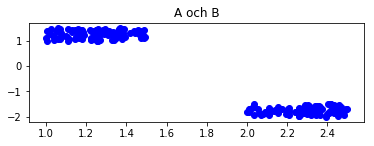

In [92]:
# Plot dataset
fig = plt.figure()
ax = fig.add_subplot(211)
ax.scatter(X_train[0, :], X_train[1,:], c = ["blue"], marker = "o")
#ax.scatter(X_test[0, :], X_test[1,:], c = ["red"], marker = "o")
ax.set(title='A och B')
#plt.plot(plt.randn(100))
plt.show()

In [93]:
# Weights: random with 0 mean. 
def init_W():
    #np.random.seed(42)
    w = []
    for i in range(2):  #Without bias set range to 2
        w.append(np.random.normal(0,0.1))
    return w

In [94]:
w = init_W()
w

[0.09894932201269091, -0.09811420174868474]

In [95]:
def accuracy(W, x, t):
    predictions = []
    correct = 0
    
    for i in range(len(t)):
        pred = np.dot(W, x[:,i])
        if pred > 0:
            predictions.append(1.0)
        else:
            predictions.append(-1.0)

    for i in range(len(predictions)):
        if predictions[i]==t[i]:
            correct+=1
    return correct/len(t)

In [96]:
def linear_eq(k, x, x0):
    return k*x+x0[1]

def linear_eq2(w1, w2, b, x):
    return w1*x+w2*x+b

def plot_decision_boundary(w):
    # Find linear function
    w1, w2, b = w[0], w[1], 0
    x0 = (0, -b / w2)
    y0 = (-b / w1, 0)    
    k = -(b / w2) / (b / w1)
    x = np.linspace(-20, 50, 100)
    fx1 = linear_eq(k, x, x0)
    fx2 = linear_eq2(w1, w2, b, x)
    
    
    # Plot points and decision boundary
    #fig = plt.figure()
    #ax = plt.axes()
    #ax.set_ylim([-1,2])
    #ax.scatter(X[0][:200], X[1][:200], c = ["blue"], marker = "o")
    #plt.plot(x, fx)
    
    #fig = plt.figure()
    #ax1 = fig.add_subplot(111)
    
    #x = plt.axes()
    #ax1.set_ylim([-1,2])
    #ax1.set_xlim([-10,10])
    #plt.scatter(X_train[0, :], X_train[1,:], c = ["blue"], marker = "o")
    #plt.scatter(X_test[0, :], X_test[1,:], c = ["red"], marker = "o")
    #pl.plot(fx1, label='medium')
    
    #pl.plot(fx2, label='direct')
    #plt.legend()
    #display.clear_output(wait=True)
    #display.display(pl.gcf())
    #time.sleep(0.001)
    
    plt.figure() # Create a new figure window
    xlist = np.linspace(-10, 10, 100) # Create 1-D arrays for x,y dimensions
    ylist = np.linspace(-10, 10, 100) 
    X,Y = np.meshgrid(xlist, ylist) # Create 2-D grid xlist,ylist values
    F = X*w1 + Y*w2 + b
    plt.scatter(X_train[0, :], X_train[1,:], c = ["blue"], marker = "o")
    plt.contour(X, Y, F, [0], colors = 'k', linestyles = 'solid')
    display.clear_output(wait=True)
    display.display(pl.gcf())
    time.sleep(0.001)
    
    plt.show()

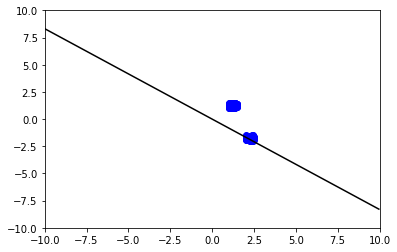

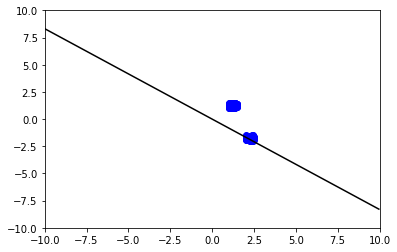

W init: [0.007459964809949144, -0.026766328392557062]
W: [-0.18186676 -0.2187353 ]


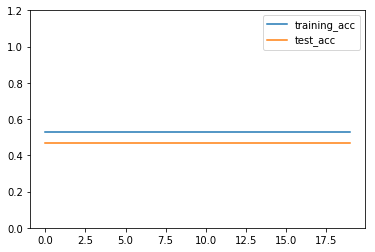

In [97]:
# Delta learning rule
W_init = init_W()
W = W_init
targets = X_train[-1,:]
input_points = X_train[:-1,:]

train_accs = []
test_accs = []

for e in range(epochs):
    epsilon = 0
    deltaW = 0

    for i in range(len(targets)):
        Wx = np.dot(W, input_points[:,i])
        epsilon = Wx - targets[i]

        # Compute Delta
        deltaW += -lr*np.dot(epsilon, np.transpose(input_points[:,i]))
    
    # Update W
    W = np.add(W,deltaW)
    print("deltaW:", deltaW)
    #print("W:", W)
    # Calculate accuracy for train and test
    train_accuracy = accuracy(W, X_train[:-1,:], X_train[-1,:])
    test_accuracy = accuracy(W, X_test[:-1,:], X_test[-1,:])
    
    train_accs.append(train_accuracy)
    test_accs.append(test_accuracy)
    
    plot_decision_boundary(W)
print('W init:', W_init)
print('W:', W)
#plot_decision_boundary(W)
plt.ylim(ymax=1.2, ymin= 0)
plt.plot(train_accs, label='training_acc')
plt.plot(test_accs, label='test_acc')
plt.legend()
plt.show()

In [72]:
test_accs[-1]

0.49

In [ ]:
a = accuracy(W, X_train[:-1,:], X_train[-1,:])
a

In [ ]:
#Perceptron learning rule
W = init_W()

train_accs = []
test_accs = []

for e in range(epochs):
    epsilon = 0
    deltaW = 0

    for i in range(len(targets)):
        Wx = np.dot(W, input_points[:,i])
        if Wx > 0:
            Wx = 1
        else:
            Wx = -1
        
        epsilon = Wx - targets[i]

        # Compute Delta
        deltaW += -lr*np.dot(epsilon, np.transpose(input_points[:,i]))
    
    # Update W
    W += deltaW
    
    # Calculate accuracy for train and test
    train_accuracy = accuracy(W, X_train[:-1,:], X_train[-1,:])
    test_accuracy = accuracy(W, X_test[:-1,:], X_test[-1,:])
    
    train_accs.append(train_accuracy)
    test_accs.append(test_accuracy)
    
    plot_decision_boundary(W)
print('W:', W)  
plt.ylim(ymax=1.2, ymin= 0)
plt.plot(train_accs, label='training_acc')
plt.plot(test_accs, label='test_acc')
plt.legend()
plt.show()

In [ ]:
test_accs[-1]

In [ ]:
#Sequential Delta rule

W = init_W()
print('W init:', W)
targets = X_train[-1,:]
input_points = X_train[:-1,:]

train_accs = []
test_accs = []

epsilon = 0
deltaW = 0

for i in range(len(targets)):
    Wx = np.dot(W, input_points[:,i])
    epsilon = Wx - targets[i]

    # Compute Delta
    deltaW += -lr*np.dot(epsilon, np.transpose(input_points[:,i]))
    
    # Update W
    W += deltaW
    
    # Calculate accuracy for train and test
    train_accuracy = accuracy(W, X_train[:-1,:], X_train[-1,:])
    test_accuracy = accuracy(W, X_test[:-1,:], X_test[-1,:])
    
    train_accs.append(train_accuracy)
    test_accs.append(test_accuracy)
    
    plot_decision_boundary(W)
print('W:', W)    
plt.ylim(ymax=1.2, ymin= 0)
plt.plot(train_accs, label='training_acc')
plt.plot(test_accs, label='test_acc')
plt.legend()
plt.show()
